<img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250px"/>

# Generative Adversarial Networks #
By Richard Sowers
* <r-sowers@illinois.edu>
* <https://publish.illinois.edu/r-sowers/>

Copyright 2021 University of Illinois Board of Trustees. All Rights Reserved.

## imports and graphics configurations

In [ ]:
import os
import numpy
import pandas
import time
import random
import matplotlib
#%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.stats
#from pandas.plotting import autocorrelation_plot
import matplotlib.offsetbox as offsetbox
from matplotlib.ticker import StrMethodFormatter
import sklearn.linear_model
import sklearn.model_selection
import itertools


def saver(fname):
    plt.savefig(fname+".png",bbox_inches="tight")

def legend(pos="bottom",ncol=3):
    if pos=="bottom":
        plt.legend(bbox_to_anchor=(0.5,-0.2), loc='upper center',facecolor="lightgray",ncol=ncol)
    elif pos=="side":
        plt.legend(bbox_to_anchor=(1.1,0.5), loc='center left',facecolor="lightgray",ncol=1)

def textbox(txt,fname=None):
    plt.figure(figsize=(1,1))
    plt.gca().add_artist(offsetbox.AnchoredText("\n".join(txt), loc="center",prop=dict(size=30)))
    plt.axis('off')
    if fname is not None:
        saver(fname)
    plt.show()
    plt.close()

In [ ]:
#for some reason, this needs to be in a separate cell
params={
    "font.size":15,
    "lines.linewidth":5
}
plt.rcParams.update(params)

In [ ]:
pngfiles=[f for f in os.listdir(".") if f.endswith(".png")]
print("existing png files: "+str(pngfiles))
print([os.remove(f) for f in pngfiles])

existing png files: ['newpoint.png', 'Noise.png', 'points.png', 'saddle.png', 'saddlepoint.png', 'twostep.png']
[None, None, None, None, None, None]


In [ ]:
from mpl_toolkits import mplot3d

## configuration variables

In [ ]:
SEED=0
xymax=2.5
fakecolor="red"
truecolor="blue"
policecolor="#49796B"

In [ ]:
N_points=100
A=numpy.array([[1,0],[2,0.5]])
b=numpy.array([2,3])

# main

In [ ]:
def transform(indata):
    return numpy.dot(indata,A.transpose())+b

In [ ]:
data=transform(scipy.stats.norm.rvs(size=(N_points,2),random_state=SEED))

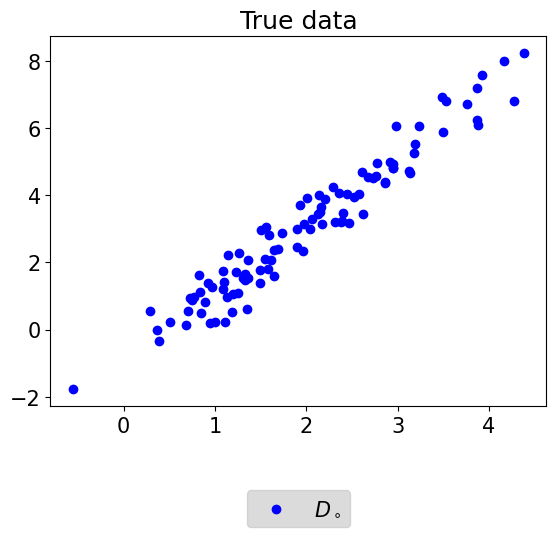

In [ ]:
(x,y)=zip(*data)
plt.figure()
plt.scatter(x,y,color=truecolor,label=r"$D_\circ$")
(XA,XB)=plt.xlim()
(YA,YB)=plt.ylim()
title=[]
title.append("True data")
plt.title("\n".join(title))
legend("bottom")
saver("points")
plt.show()
plt.close()

In [ ]:
(newx,newy)=transform(scipy.stats.norm.rvs(size=(1,2),random_state=SEED+1)).squeeze()

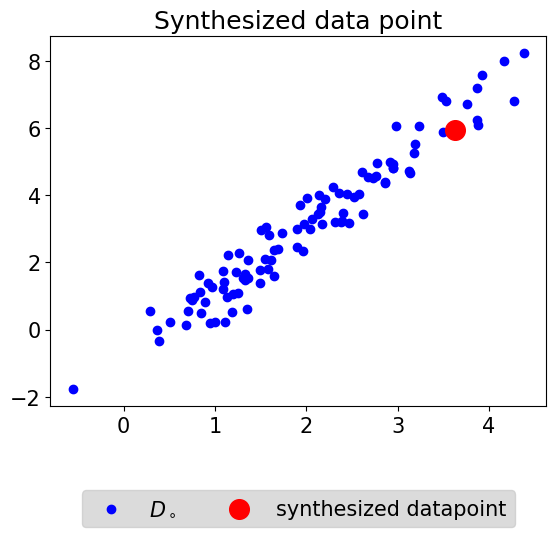

In [ ]:
plt.figure()
plt.scatter(x,y,color=truecolor,label=r"$D_\circ$")
plt.scatter(newx,newy,color=fakecolor,label="synthesized datapoint",s=200)
plt.xlim(XA,XB)
plt.ylim(YA,YB)
title=[]
title.append("Synthesized data point")
plt.title("\n".join(title))
legend("bottom")
saver("newpoint")
plt.show()
plt.close()

In [ ]:
Noise=scipy.stats.norm.rvs(size=(N_points,2),random_state=SEED+2)

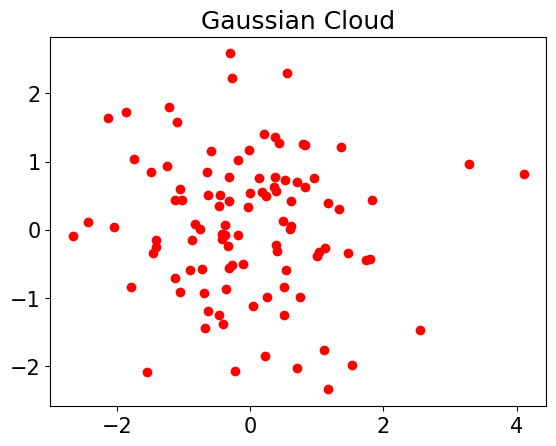

In [ ]:
(noisex,noisey)=zip(*Noise)
plt.figure()
plt.scatter(noisex,noisey,color=fakecolor,label=r"$N$")
title=[]
title.append("Gaussian Cloud")
plt.title("\n".join(title))
saver("Noise")
plt.show()
plt.close()

In [ ]:
class f:
    @staticmethod
    def eval(x,y):
        return (x-2*y)**2-7*(y-1)**2


    @staticmethod
    def partialx(x,y):
        return 2*(x-2*y)

    @staticmethod
    def partialy(x,y):
        return 4*(x-2*y)-14*(y-1)

In [ ]:
x = numpy.linspace(0,4,100)
y = numpy.linspace(-1,3,100)

X, Y = numpy.meshgrid(x, y)
Z = f.eval(X,Y)

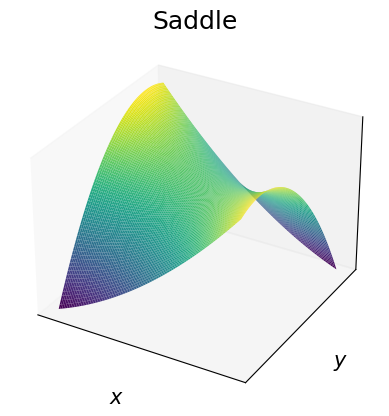

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis',edgecolor='none')
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
title=[]
title.append("Saddle")
plt.title("\n".join(title))
plt.xticks([],[])
plt.yticks([],[])
ax.set_zticks([],[])
saver("saddle")
plt.show()
plt.close()

In [ ]:
(xx,yy)=(0,0)
(x_final,y_final)=(2,1)
results=[(xx,yy)]
N=25
delta=0.05

for n in range(N):
    xx-=delta*f.partialx(xx,yy)
    yy+=delta*f.partialy(xx,yy)
    results.append((xx,yy))

In [ ]:
(xlist,ylist)=zip(*results)

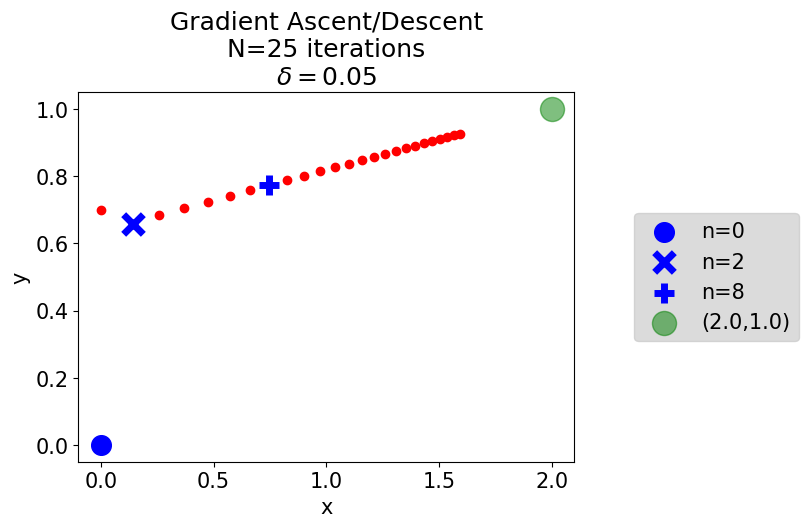

In [ ]:
plt.figure()
plt.scatter(xlist,ylist,color="red")
for cnt,m in zip([int(N/100),int(N/10),int(N/3)],["o","x","+"]):
    plt.scatter(xlist[cnt],ylist[cnt],color="blue",s=200,marker=m,label="n={0:n}".format(cnt))
plt.scatter(x_final,y_final,s=300,color="green",label="({0:.1f},{1:.1f})".format(x_final,y_final),zorder=-5,alpha=0.5)
legend("side")
plt.xlabel("x")
plt.ylabel("y")
title=[]
title.append("Gradient Ascent/Descent")
title.append("N={0:n} iterations".format(N))
title.append(r"$\delta={0:.2f}$".format(delta))
plt.title("\n".join(title))
saver("saddlepoint")
plt.show()
plt.close()

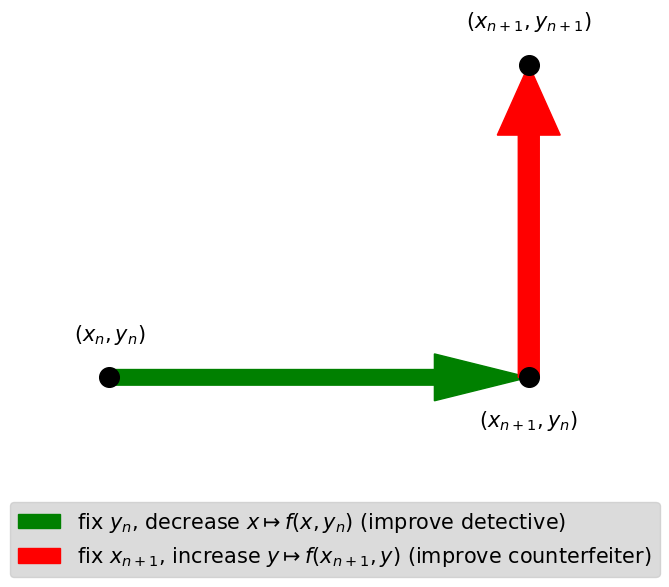

In [ ]:
eps=0.1
plt.figure()
plt.scatter([0],[0],color="black",s=200,zorder=5)
plt.text(0,0+eps,r"$(x_n,y_n)$",va="bottom",ha="center")
plt.scatter([1],[0],color="black",s=200,zorder=5)
plt.text(1,0-eps,r"$(x_{n+1},y_n)$",va="top",ha="center")
plt.scatter([1],[1],color="black",s=200,zorder=5)
plt.text(1,1+eps,r"$(x_{n+1},y_{n+1})$",va="bottom",ha="center")
plt.arrow(0,0,1,0,label=r"fix $y_n$, decrease $x\mapsto f(x,y_n)$ (improve detective)",width=.05,color="green",linewidth=1,length_includes_head=True)
plt.arrow(1,0,0,1,label="fix $x_{n+1}$, increase $y\mapsto f(x_{n+1},y)$ (improve counterfeiter)",width=.05,color="red",linewidth=1,length_includes_head=True)
#plt.xlim(-1,2)
#plt.ylim(-1,2)
plt.xticks([],[])
plt.yticks([],[])
for side in plt.gca().spines.keys():
    plt.gca().spines[side].set_visible(False)
legend("bottom",ncol=1)
saver("twostep")
plt.show()
plt.close()